Laptops price predictions
https://www.kaggle.com/datasets/muhammetvarl/laptop-price

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn

In [222]:
df = pd.read_csv("/content/laptop_price.csv", encoding="ISO-8859-1")

In [223]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [224]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [225]:
df['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

In [226]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [227]:
df = df.join(pd.get_dummies(df['Company']))
df = df.drop('Company', axis=1)

In [228]:
df = df.drop("Product", axis=1)

In [229]:
df["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [230]:
df = df.join(pd.get_dummies(df["TypeName"]))

In [231]:
df = df.drop("TypeName", axis=1)

In [232]:
screen_params = df["ScreenResolution"].str.split(" ").apply(lambda x: x[-1])

In [233]:
df['screen_width'] = screen_params.str.split("x").apply(lambda x: x[0]).astype("int")
df['screen_height'] = screen_params.str.split("x").apply(lambda x: x[1]).astype("int")

In [234]:
df = df.drop("ScreenResolution", axis=1)

In [235]:
frequency = df["Cpu"].str.split(" ").apply(lambda x: x[-1])
df["freq"] = frequency.str[:-3].astype("float")

In [236]:
df.dtypes

laptop_ID               int64
Inches                float64
Cpu                    object
Ram                    object
Memory                 object
Gpu                    object
OpSys                  object
Weight                 object
Price_euros           float64
Acer                    uint8
Apple                   uint8
Asus                    uint8
Chuwi                   uint8
Dell                    uint8
Fujitsu                 uint8
Google                  uint8
HP                      uint8
Huawei                  uint8
LG                      uint8
Lenovo                  uint8
MSI                     uint8
Mediacom                uint8
Microsoft               uint8
Razer                   uint8
Samsung                 uint8
Toshiba                 uint8
Vero                    uint8
Xiaomi                  uint8
2 in 1 Convertible      uint8
Gaming                  uint8
Netbook                 uint8
Notebook                uint8
Ultrabook               uint8
Workstatio

In [237]:
df["CPU"] = df["Cpu"].str.split(" ").apply(lambda x: x[0])

In [238]:
df = df.join(pd.get_dummies(df["CPU"], prefix="CPU"))

In [242]:
df["RAM GB"] = df["Ram"].str[:-2].astype("int")

In [247]:
df = df.join(pd.get_dummies(df["OpSys"]))

In [251]:
df["Weight kg"] = df["Weight"].str[:-2].astype("float")

In [266]:
df["GPU"] = df["Gpu"].str.split(" ").apply(lambda x: x[0])

In [268]:
df = df.join(pd.get_dummies(df["GPU"], prefix="GPU"))

In [280]:
df["Inches"] = df["Inches"].astype("float")

In [298]:
df["Memory type"] = df["Memory"].str.split(" ").apply(lambda x: x[-1])

In [299]:
df = df.join(pd.get_dummies(df["Memory type"]))

In [300]:
df

,laptop_ID,Inches,Memory,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,GPU_AMD,GPU_ARM,GPU_Intel,GPU_Nvidia,Hard Memory,Memory type,HDD,Hybrid,SSD,Storage
0,1,13.3,128GB SSD,1339.69,0,1,0,0,0,0,...,0,0,1,0,128000.0,SSD,0,0,1,0
1,2,13.3,128GB Flash Storage,898.94,0,1,0,0,0,0,...,0,0,1,0,128000.0,Storage,0,0,0,1
2,3,15.6,256GB SSD,575.00,0,0,0,0,0,0,...,0,0,1,0,256000.0,SSD,0,0,1,0
3,4,15.4,512GB SSD,2537.45,0,1,0,0,0,0,...,1,0,0,0,512000.0,SSD,0,0,1,0
4,5,13.3,256GB SSD,1803.60,0,1,0,0,0,0,...,0,0,1,0,256000.0,SSD,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,128GB SSD,638.00,0,0,0,0,0,0,...,0,0,1,0,128000.0,SSD,0,0,1,0
1299,1317,13.3,512GB SSD,1499.00,0,0,0,0,0,0,...,0,0,1,0,512000.0,SSD,0,0,1,0
1300,1318,14.0,64GB Flash Storage,229.00,0,0,0,0,0,0,...,0,0,1,0,64000.0,Storage,0,0,0,1
1301,1319,15.6,1TB HDD,764.00,0,0,0,0,0,0,...,1,0,0,0,100000.0,HDD,1,0,0,0


In [292]:
def convert_into_mb(memory):
  if "GB" in memory:
    return float(memory[:-2]) * 1000
  elif "TB" in memory:
    return float(memory[:-2]) * 100000

In [294]:
df["Hard Memory"] = df["Memory"].str.split(" ").apply(lambda x: convert_into_mb(x[0]))

In [308]:
df.dtypes

laptop_ID               int64
Inches                float64
Price_euros           float64
Acer                    uint8
Apple                   uint8
Asus                    uint8
Chuwi                   uint8
Dell                    uint8
Fujitsu                 uint8
Google                  uint8
HP                      uint8
Huawei                  uint8
LG                      uint8
Lenovo                  uint8
MSI                     uint8
Mediacom                uint8
Microsoft               uint8
Razer                   uint8
Samsung                 uint8
Toshiba                 uint8
Vero                    uint8
Xiaomi                  uint8
2 in 1 Convertible      uint8
Gaming                  uint8
Netbook                 uint8
Notebook                uint8
Ultrabook               uint8
Workstation             uint8
screen_width            int64
screen_height           int64
freq                  float64
CPU_AMD                 uint8
CPU_Intel               uint8
CPU_Samsun

In [306]:
com_df = df.copy()

In [307]:
com_df

,laptop_ID,Inches,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,...,Weight kg,GPU_AMD,GPU_ARM,GPU_Intel,GPU_Nvidia,Hard Memory,HDD,Hybrid,SSD,Storage
0,1,13.3,1339.69,0,1,0,0,0,0,0,...,1.37,0,0,1,0,128000.0,0,0,1,0
1,2,13.3,898.94,0,1,0,0,0,0,0,...,1.34,0,0,1,0,128000.0,0,0,0,1
2,3,15.6,575.00,0,0,0,0,0,0,0,...,1.86,0,0,1,0,256000.0,0,0,1,0
3,4,15.4,2537.45,0,1,0,0,0,0,0,...,1.83,1,0,0,0,512000.0,0,0,1,0
4,5,13.3,1803.60,0,1,0,0,0,0,0,...,1.37,0,0,1,0,256000.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,638.00,0,0,0,0,0,0,0,...,1.80,0,0,1,0,128000.0,0,0,1,0
1299,1317,13.3,1499.00,0,0,0,0,0,0,0,...,1.30,0,0,1,0,512000.0,0,0,1,0
1300,1318,14.0,229.00,0,0,0,0,0,0,0,...,1.50,0,0,1,0,64000.0,0,0,0,1
1301,1319,15.6,764.00,0,0,0,0,0,0,0,...,2.19,1,0,0,0,100000.0,1,0,0,0


In [330]:
correlation = df.corr()["Price_euros"].apply(abs).sort_values()[25:]

In [341]:
selected = list(correlation.index)

In [342]:
selected_df

['macOS',
 'Netbook',
 'Chrome OS',
 'Windows 10',
 'Windows 7',
 'Linux',
 'HDD',
 'No OS',
 'MSI',
 'CPU_AMD',
 'CPU_Intel',
 'GPU_Intel',
 'GPU_AMD',
 'Acer',
 'Weight kg',
 'Storage',
 'Razer',
 'Workstation',
 'Ultrabook',
 'SSD',
 'Hard Memory',
 'GPU_Nvidia',
 'Gaming',
 'freq',
 'Notebook',
 'screen_height',
 'screen_width',
 'RAM GB',
 'Price_euros']

<Axes: >

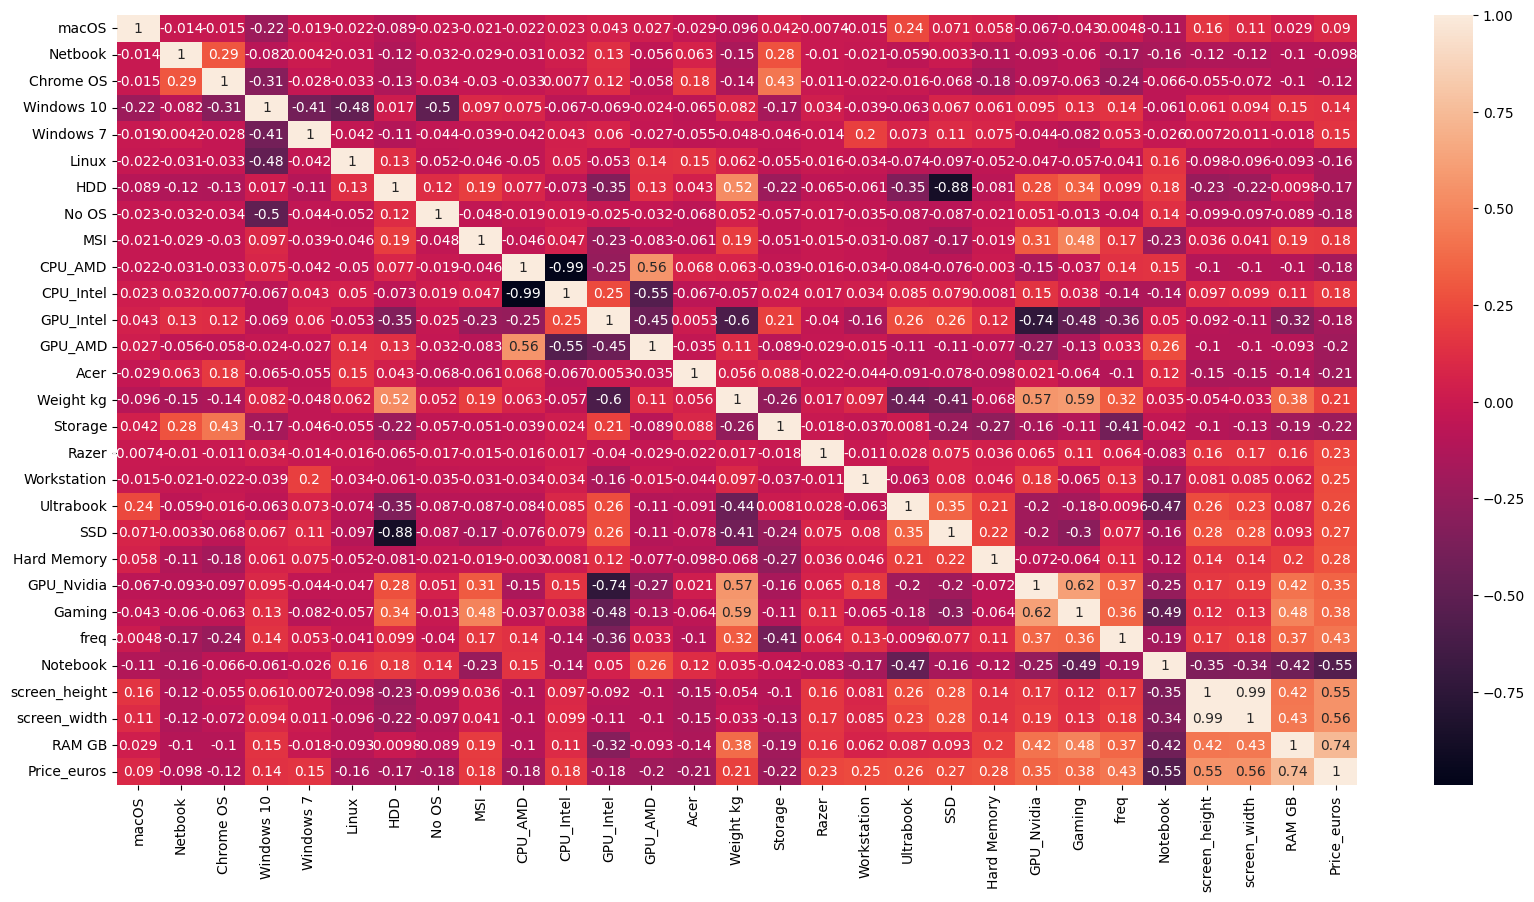

In [345]:
plt.figure(figsize=(20, 10))
sbn.heatmap(df[selected].corr(), annot=True)

In [348]:
new_df = df[selected]

In [349]:
new_df

,macOS,Netbook,Chrome OS,Windows 10,Windows 7,Linux,HDD,No OS,MSI,CPU_AMD,...,SSD,Hard Memory,GPU_Nvidia,Gaming,freq,Notebook,screen_height,screen_width,RAM GB,Price_euros
0,1,0,0,0,0,0,0,0,0,0,...,1,128000.0,0,0,2.3,0,1600,2560,8,1339.69
1,1,0,0,0,0,0,0,0,0,0,...,0,128000.0,0,0,1.8,0,900,1440,8,898.94
2,0,0,0,0,0,0,0,1,0,0,...,1,256000.0,0,0,2.5,1,1080,1920,8,575.00
3,1,0,0,0,0,0,0,0,0,0,...,1,512000.0,0,0,2.7,0,1800,2880,16,2537.45
4,1,0,0,0,0,0,0,0,0,0,...,1,256000.0,0,0,3.1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,1,0,0,0,0,0,0,...,1,128000.0,0,0,2.5,0,1080,1920,4,638.00
1299,0,0,0,1,0,0,0,0,0,0,...,1,512000.0,0,0,2.5,0,1800,3200,16,1499.00
1300,0,0,0,1,0,0,0,0,0,0,...,0,64000.0,0,0,1.6,1,768,1366,2,229.00
1301,0,0,0,1,0,0,1,0,0,0,...,0,100000.0,0,0,2.5,1,768,1366,6,764.00


In [347]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [350]:
X, y = new_df.drop("Price_euros", axis=1), new_df["Price_euros"]

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [356]:
scaler = StandardScaler()

In [357]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression.

In [359]:
from sklearn.linear_model import LinearRegression

In [360]:
linear_model = LinearRegression()

In [361]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [363]:
linear_model.score(X_train_scaled, y_train)

0.7124324611666555

In [374]:
y_pred_linear = linear_model.predict(X_test_scaled)

A random forest regressor.

In [376]:
from sklearn.ensemble import RandomForestRegressor

In [377]:
model_rfr = RandomForestRegressor()

In [378]:
model_rfr.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [379]:
model_rfr.score(X_test_scaled, y_test)

0.8362688447113384

In [391]:
y_pred_forest = model_rfr.predict(X_test_scaled)

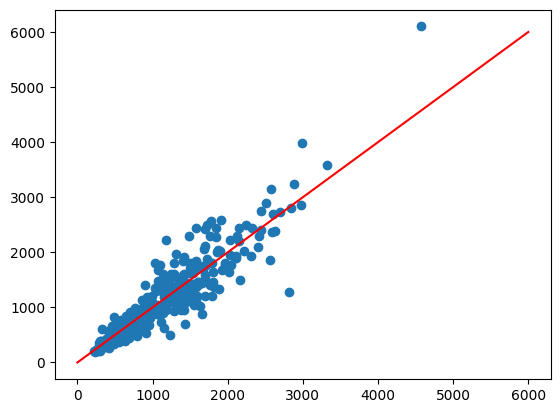

In [392]:
plt.scatter(y_pred_forest, y_test)
plt.plot(range(6000), range(6000), c="r")

Regression based on k-nearest neighbors.

In [380]:
from sklearn.neighbors import KNeighborsRegressor

In [381]:
model_knr = KNeighborsRegressor()
model_knr.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [382]:
model_knr.score(X_test_scaled, y_test)

0.7576096961397695

In [384]:
y_pred_knr = model_knr.predict(X_test_scaled)

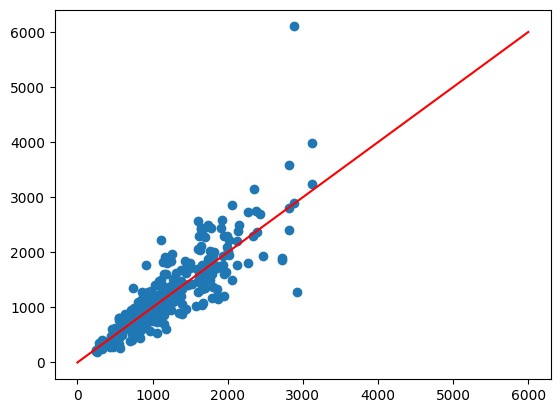

In [385]:
plt.scatter(y_pred_knr, y_test)
plt.plot(range(6000), range(6000), c="r")

Decision Tree Regression

In [396]:
from sklearn.tree import DecisionTreeRegressor

In [397]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [398]:
model_dtr.score(X_test_scaled, y_test)

0.7144317128957429

In [399]:
y_pred_dtr = model_dtr.predict(X_test_scaled)

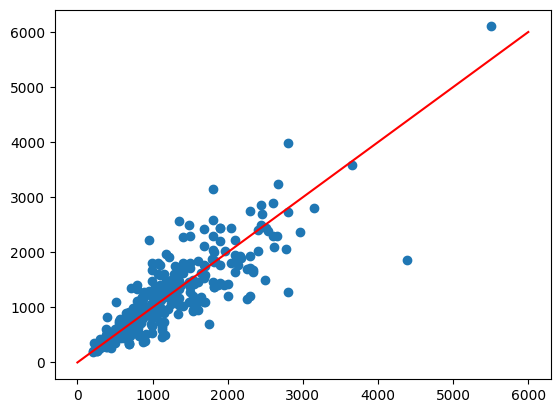

In [400]:
plt.scatter(y_pred_dtr, y_test)
plt.plot(range(6000), range(6000), c="r")